# DNN - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from tensorflow.keras import Model, layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix,f1_score
from sklearn.utils import shuffle


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint

In [3]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [4]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    df_train = shuffle(df_train)
    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    X_train.reset_index(inplace=True, drop=True)
    Y_train.reset_index(inplace=True, drop=True)
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [5]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')
    df_test = shuffle(df_test)
    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    X_test.reset_index(inplace=True, drop=True)
    Y_test.reset_index(inplace=True, drop=True)
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [6]:
X_train.shape

(114324, 77)

In [7]:
METRICS = [ 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [8]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', 
    verbose=1,
    patience=5,
    mode='max',
    restore_best_weights=True)

In [9]:
X_train.shape

(114324, 77)

In [10]:

def neural_network(optimizer='sgd', init='glorot_uniform'):
    #Neural Network Model
    model = Sequential()
    model.add(Dense(256, input_dim=77, activation='relu', kernel_initializer=init, bias_initializer='zeros'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = METRICS)
    
    return model

In [11]:
model = neural_network(optimizer='sgd', init='glorot_uniform')

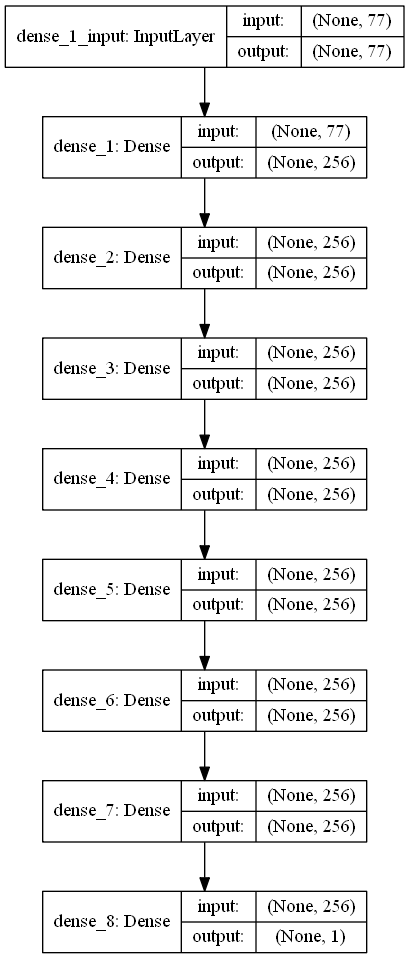

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
estimator = KerasClassifier(build_fn=neural_network)
estimator.fit(X_train,Y_train,verbose=1,callbacks=[early_stopping], epochs=200,validation_split=0.2, batch_size=128)


Train on 91459 samples, validate on 22865 samples
Epoch 1/200
91459/91459 [==============================] - 8s 89us/step - loss: 0.2821 - accuracy: 0.8493 - precision: 0.8181 - recall: 0.8883 - auc: 0.9008 - val_loss: 0.0792 - val_accuracy: 0.9321 - val_precision: 0.9196 - val_recall: 0.9471 - val_auc: 0.9752
Epoch 2/200
91459/91459 [==============================] - 8s 84us/step - loss: 0.0635 - accuracy: 0.9478 - precision: 0.9417 - recall: 0.9545 - auc: 0.9839 - val_loss: 0.0522 - val_accuracy: 0.9571 - val_precision: 0.9548 - val_recall: 0.9596 - val_auc: 0.9887
Epoch 3/200
91459/91459 [==============================] - 7s 79us/step - loss: 0.0399 - accuracy: 0.9626 - precision: 0.9620 - recall: 0.9633 - auc: 0.9913 - val_loss: 0.0345 - val_accuracy: 0.9672 - val_precision: 0.9670 - val_recall: 0.9674 - val_auc: 0.9932
Epoch 4/200
91459/91459 [==============================] - 7s 75us/step - loss: 0.0297 - accuracy: 0.9706 - precision: 0.9704 - recall: 0.9709 - auc: 0.9943 - val_l

Epoch 32/200
91459/91459 [==============================] - 8s 86us/step - loss: 0.0103 - accuracy: 0.9923 - precision: 0.9925 - recall: 0.9920 - auc: 0.9992 - val_loss: 0.0186 - val_accuracy: 0.9923 - val_precision: 0.9926 - val_recall: 0.9921 - val_auc: 0.9992
Epoch 33/200
91459/91459 [==============================] - 6s 68us/step - loss: 0.0101 - accuracy: 0.9924 - precision: 0.9927 - recall: 0.9921 - auc: 0.9993 - val_loss: 0.0194 - val_accuracy: 0.9925 - val_precision: 0.9927 - val_recall: 0.9922 - val_auc: 0.9993
Epoch 34/200
91459/91459 [==============================] - 6s 65us/step - loss: 0.0104 - accuracy: 0.9925 - precision: 0.9928 - recall: 0.9922 - auc: 0.9993 - val_loss: 0.0177 - val_accuracy: 0.9926 - val_precision: 0.9929 - val_recall: 0.9923 - val_auc: 0.9993
Epoch 35/200
91459/91459 [==============================] - 8s 86us/step - loss: 0.0101 - accuracy: 0.9926 - precision: 0.9929 - recall: 0.9924 - auc: 0.9993 - val_loss: 0.0177 - val_accuracy: 0.9927 - val_preci

91459/91459 [==============================] - 6s 63us/step - loss: 0.0062 - accuracy: 0.9955 - precision: 0.9959 - recall: 0.9951 - auc: 0.9996 - val_loss: 0.0193 - val_accuracy: 0.9955 - val_precision: 0.9959 - val_recall: 0.9951 - val_auc: 0.9996
Epoch 95/200
91459/91459 [==============================] - 5s 59us/step - loss: 0.0060 - accuracy: 0.9955 - precision: 0.9959 - recall: 0.9951 - auc: 0.9996 - val_loss: 0.0199 - val_accuracy: 0.9955 - val_precision: 0.9960 - val_recall: 0.9951 - val_auc: 0.9996
Epoch 96/200
91459/91459 [==============================] - 5s 57us/step - loss: 0.0058 - accuracy: 0.9955 - precision: 0.9960 - recall: 0.9951 - auc: 0.9996 - val_loss: 0.0179 - val_accuracy: 0.9956 - val_precision: 0.9960 - val_recall: 0.9951 - val_auc: 0.9996
Epoch 97/200
91459/91459 [==============================] - 6s 67us/step - loss: 0.0059 - accuracy: 0.9956 - precision: 0.9960 - recall: 0.9952 - auc: 0.9996 - val_loss: 0.0181 - val_accuracy: 0.9956 - val_precision: 0.9960 

91459/91459 [==============================] - 7s 81us/step - loss: 0.0050 - accuracy: 0.9964 - precision: 0.9967 - recall: 0.9959 - auc: 0.9997 - val_loss: 0.0197 - val_accuracy: 0.9964 - val_precision: 0.9967 - val_recall: 0.9960 - val_auc: 0.9997
Epoch 157/200
91459/91459 [==============================] - 8s 83us/step - loss: 0.0048 - accuracy: 0.9964 - precision: 0.9968 - recall: 0.9960 - auc: 0.9997 - val_loss: 0.0199 - val_accuracy: 0.9964 - val_precision: 0.9968 - val_recall: 0.9960 - val_auc: 0.9997
Epoch 158/200
91459/91459 [==============================] - 8s 84us/step - loss: 0.0050 - accuracy: 0.9964 - precision: 0.9968 - recall: 0.9960 - auc: 0.9997 - val_loss: 0.0179 - val_accuracy: 0.9965 - val_precision: 0.9968 - val_recall: 0.9960 - val_auc: 0.9997
Epoch 159/200
91459/91459 [==============================] - 8s 83us/step - loss: 0.0050 - accuracy: 0.9965 - precision: 0.9968 - recall: 0.9960 - auc: 0.9997 - val_loss: 0.0193 - val_accuracy: 0.9965 - val_precision: 0.99

In [12]:
print("Cross-Validation set accuracy: {:.6f} %".format((cross_val_score(estimator, X_train, Y_train, 
                                                                        cv=3,scoring='accuracy').mean())*100))
test_predictions = estimator.predict(X_test)
print("Train set accuracy           : {:.4f} %".format(estimator.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Epoch 1/1
76216/76216 [==============================] - 15s 191us/step - loss: 0.1312 - accuracy: 0.9969 - precision: 0.9970 - recall: 0.9962 - auc: 0.9997
Epoch 1/1
76216/76216 [==============================] - 15s 196us/step - loss: 0.1403 - accuracy: 0.9968 - precision: 0.9968 - recall: 0.9961 - auc: 0.9997
Epoch 1/1
76216/76216 [==============================] - 15s 196us/step - loss: 0.1325 - accuracy: 0.9967 - precision: 0.9967 - recall: 0.9960 - auc: 0.9997
Cross-Validation set accuracy: 98.313565 %
114324/114324 [==============================] - 8s 72us/step
Train set accuracy           : 99.6741 %
Test set accuracy            : 78.4756 %
Test set precision : 0.9237
Test set recall    : 0.6775
Test set F1-score  : 0.7817


True Negatives  : 0.93
False Positives : 0.07
False Negatives : 0.32
True Positives  : 0.68


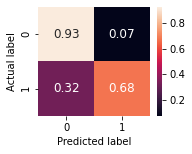

In [13]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions, normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions)

In [14]:
print(classification_report(Y_test, test_predictions.round()))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      9711
           1       0.92      0.68      0.78     12803

    accuracy                           0.78     22514
   macro avg       0.80      0.80      0.78     22514
weighted avg       0.82      0.78      0.78     22514



In [15]:
from sklearn.metrics import roc_curve, auc

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


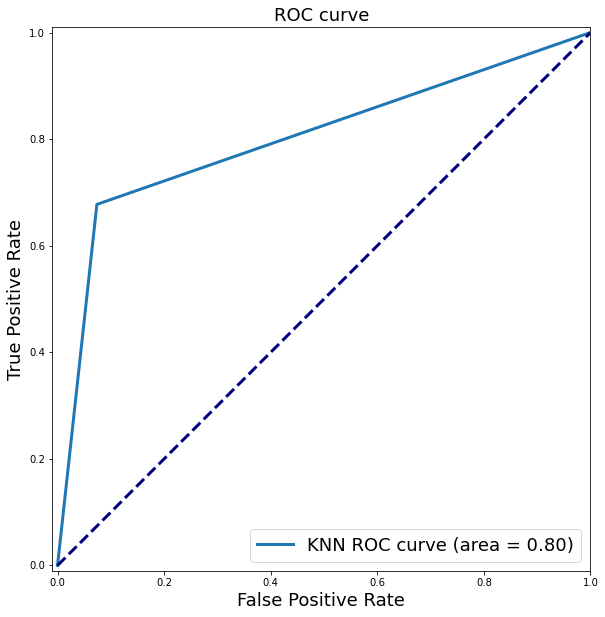

In [16]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='KNN ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [18]:
estimator.get_params()

{'build_fn': <function __main__.neural_network(optimizer='sgd', init='glorot_uniform')>}

In [19]:
optimizers = ['sgd','rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([50, 100, 150,200])
batches = np.array([32,64,128,256,512])
#param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
param_grid = dict(nb_epoch=epochs, batch_size=batches)

optimal_params = GridSearchCV(
    estimator = estimator,
    param_grid = param_grid,
    cv=2,
    scoring ='accuracy',
    verbose = 2)
optimal_params.fit(X_train,Y_train)
print(optimal_params.best_params_)


Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] batch_size=32, nb_epoch=50 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/1
57162/57162 [==============================] - 12s 212us/step - loss: 0.0127 - accuracy: 0.9965 - precision: 0.9978 - recall: 0.9943 - auc: 0.9996
[CV] ....................... batch_size=32, nb_epoch=50, total=  18.4s
[CV] batch_size=32, nb_epoch=50 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.3s remaining:    0.0s


Epoch 1/1
57162/57162 [==============================] - 12s 214us/step - loss: 0.0206 - accuracy: 0.9965 - precision: 0.9978 - recall: 0.9943 - auc: 0.9996
[CV] ....................... batch_size=32, nb_epoch=50, total=  18.8s
[CV] batch_size=32, nb_epoch=100 .....................................
Epoch 1/1
57162/57162 [==============================] - 12s 210us/step - loss: 0.0152 - accuracy: 0.9965 - precision: 0.9978 - recall: 0.9943 - auc: 0.9996
[CV] ...................... batch_size=32, nb_epoch=100, total=  18.6s
[CV] batch_size=32, nb_epoch=100 .....................................
Epoch 1/1
57162/57162 [==============================] - 12s 205us/step - loss: 0.0162 - accuracy: 0.9965 - precision: 0.9978 - recall: 0.9943 - auc: 0.9996
[CV] ...................... batch_size=32, nb_epoch=100, total=  18.6s
[CV] batch_size=32, nb_epoch=150 .....................................
Epoch 1/1
57162/57162 [==============================] - 12s 212us/step - loss: 0.0145 - accuracy: 0.99

[CV] ..................... batch_size=256, nb_epoch=150, total=   8.1s
[CV] batch_size=256, nb_epoch=150 ....................................
Epoch 1/1
57162/57162 [==============================] - 4s 66us/step - loss: 0.1567 - accuracy: 0.9965 - precision: 0.9975 - recall: 0.9943 - auc: 0.9995
[CV] ..................... batch_size=256, nb_epoch=150, total=   8.1s
[CV] batch_size=256, nb_epoch=200 ....................................
Epoch 1/1
57162/57162 [==============================] - 4s 71us/step - loss: 0.0921 - accuracy: 0.9966 - precision: 0.9975 - recall: 0.9943 - auc: 0.9995
[CV] ..................... batch_size=256, nb_epoch=200, total=   8.7s
[CV] batch_size=256, nb_epoch=200 ....................................
Epoch 1/1
57162/57162 [==============================] - 4s 70us/step - loss: 0.1334 - accuracy: 0.9966 - precision: 0.9975 - recall: 0.9943 - auc: 0.9995: 5s - loss: 0.4511 - accuracy: 0.9966 - preci
[CV] ..................... batch_size=256, nb_epoch=200, total=

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  7.8min finished


RuntimeError: Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x000001D39CDE35F8>, as the constructor either does not set or modifies parameter batch_size

In [ ]:
def plot_metrics(history):
  metrics =  ['accuracy', 'precision', 'recall','auc']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplots(2,2)
    plt.plot(history.epochs,  history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epochs, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'accuracy':
      plt.ylim([0.8,1])
    elif metric == 'precision':
      plt.ylim([0.8,1])
    elif metric == 'recall':
      plt.ylim([0.8,1])

    plt.legend()
    
plot_metrics(estimator)